In [0]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LinearRegression

Read csv file

In [2]:
data = pd.read_csv("SwissRoll.csv")

df = pd.DataFrame(data)

split_ratio = 0.2
test_size = int(split_ratio * len(data))
print(test_size)
df

300


,x0,x1,x2,color
0,-9.230651,8.968987,-3.151381,9.753774
1,6.360328,0.646813,1.080954,6.451529
2,-9.440236,7.225525,-1.833168,9.616578
3,0.937607,15.360379,-4.814284,4.904736
4,-6.842105,3.672426,-7.653657,10.266103
...,...,...,...,...
1495,-8.649355,7.485054,2.849223,9.106558
1496,7.080548,16.085379,11.598673,13.589090
1497,1.389402,4.108676,7.545012,7.671873
1498,9.813777,3.806556,8.988317,13.307894


In [3]:
df = shuffle(df)
df

,x0,x1,x2,color
94,1.369346,9.643286,7.551444,7.674595
295,-5.460337,6.733165,6.575400,8.546998
68,6.202811,8.853026,2.406498,6.653277
570,8.359911,3.048628,10.558629,13.467470
157,2.068747,3.204221,-4.691833,5.127671
...,...,...,...,...
23,3.315854,13.364507,6.602745,7.388581
727,5.736332,8.456752,3.770774,6.864710
823,2.954496,14.082429,-4.404066,5.303287
485,3.786265,19.944435,-3.955934,5.475876


Split data to test and train

In [0]:
test_set = df[:test_size]
train_set = df[test_size:]
assert len(test_set) + len(train_set) == len(df)

y_train = train_set['color'].values
x_train = train_set.drop('color', 1)
x_train = x_train.values
assert len(y_train) == len(x_train) 

y_test = test_set['color'].values
x_test = test_set.drop('color', 1)
x_test = x_test.values
assert len(y_test) == len(x_test) 

LDA with 2 components on test set

In [0]:
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(x_train)
x_transformed_test = embedding.transform(x_test)

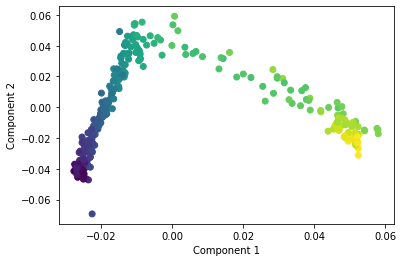

In [17]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    x_transformed_test[:,0],
    x_transformed_test[:,1],
    c=y_test
    
)

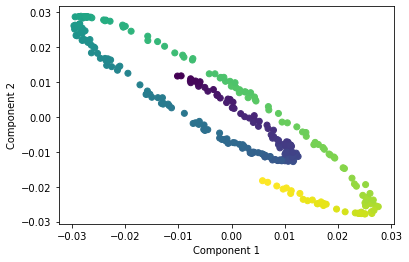

In [22]:
reg = LinearRegression().fit(x_train, X_transformed)

x_transformed_test = reg.predict(x_test)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    x_transformed_test[:,0],
    x_transformed_test[:,1],
    c=y_test  
)